![concrete strength](http://archive.ics.uci.edu/ml/assets/MLimages/Large165.jpg)

### Data Set Information:

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients.

> **Sources:**
    
    Owner of database: Volker Lohweg (University of Applied Sciences, Ostwestfalen-Lippe, volker.lohweg '@' hs-owl.de)
    Donor of database: Helene DÃ¶rksen (University of Applied Sciences, Ostwestfalen-Lippe, helene.doerksen '@' hs-owl.de)
    Date received: August, 2012
    
> **Attribute Information:**
    
    Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

| Name | Data Type | Measurement | Description |
|------|-----------|-------------|-------------|
| Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable |
| Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable |
| Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable |
| Water (component 4) | quantitative | kg in a m3 mixture | Input Variable |
| Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable |
| Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable |
| Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable |
| Age | quantitative | Day (1~365) | Input Variable |
| Concrete compressive strength | quantitative | MPa | Output Variable |

| Fields         |  values |
|----------------------------|--------------|
| Data Set Characteristics:  | Multivariate | 
| Number of Instances: | 1030 |
| Area: | Physical |
| Attribute Characteristics: | Real |
| umber of Attributes: | 9 |
| Date Donated | 2007-08-03 |
| Associated Tasks: | Regression |
| Missing Values? | N/A |
| Number of Web Hits: | 241166 |

> **Source:**

Original Owner and Donor
Prof. I-Cheng Yeh
Department of Information Management
Chung-Hua University,
Hsin Chu, Taiwan 30067, R.O.C.
e-mail:icyeh '@' chu.edu.tw
TEL:886-3-5186511

**Install required liabraries**

1. ! pip install numpy 
2. ! pip install pandas
3. ! pip install matplotlib
4. ! pip install seaborn
5. ! pip install -U scikit-learn
6. ! pip install graphviz
7. ! pip install pydot
8. ! pip install xgboost

**Import some tools**

In [1]:
#! pip install pyforest
from pyforest import *
lazy_imports()

['from openpyxl import load_workbook',
 'from pyspark import SparkContext',
 'import seaborn as sns',
 'import sys',
 'from dask import dataframe as dd',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'from pathlib import Path',
 'import matplotlib as mpl',
 'import plotly.express as px',
 'import nltk',
 'from sklearn.manifold import TSNE',
 'import datetime as dt',
 'import matplotlib.pyplot as plt',
 'from sklearn.preprocessing import OneHotEncoder',
 'import numpy as np',
 'import sklearn',
 'import statistics',
 'import bokeh',
 'import gensim',
 'import os',
 'import tensorflow as tf',
 'import lightgbm as lgb',
 'import glob',
 'from sklearn.model_selection import train_test_split',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'from sklearn.ensemble import RandomForestClassifier',
 'import re',
 'import plotly as py',
 'import tqdm',
 'import dash',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import pickle',
 'import spacy',
 'i

In [2]:
import itertools

In [3]:
df = pd.read_csv("concrete_data.csv", sep=r'\s*,\s*', header=0, encoding='ascii', engine='python')
df.head()

<IPython.core.display.Javascript object>

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df = df.rename(columns = {'cement': 'cement',
                         'blast_furnace_slag': 'slag',
                         'fly_ash': 'ash',
                         'water': 'water',
                         'superplasticizer': 'superplasticizer',
                         'coarse_aggregate': 'coarseagg',
                         'fine_aggregate': 'fineagg',
                         'age': 'age',
                         'concrete_compressive_strength': 'strength'})

In [5]:
df.head()

,cement,slag,ash,water,superplasticizer,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
df.dtypes

cement              float64
slag                float64
ash                 float64
water               float64
superplasticizer    float64
coarseagg           float64
fineagg             float64
age                   int64
strength            float64
dtype: object

In [7]:
df.isnull().sum()

cement              0
slag                0
ash                 0
water               0
superplasticizer    0
coarseagg           0
fineagg             0
age                 0
strength            0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


## Exploratory data analysis

In [9]:
from scipy import stats

**For cement**

In [10]:
Q1 = df['cement'].quantile(q = 0.25)
Q3 = df['cement'].quantile(q = 0.75)
print('first Quartile is ', Q1)
print('third Quartile is ', Q3)
print('Interquartile range (IQR) is', stats.iqr(df['cement']))

first Quartile is  192.375
third Quartile is  350.0
Interquartile range (IQR) is 157.625


In [11]:
Lower_outlier = Q1 - 1.5*(Q3 - Q1)
Upper_outlier = Q3 + 1.5*(Q3 - Q1)

print('Lower outlier Limit in Cement is ', Lower_outlier)
print('Upper outlier Limit in Cement is ', Upper_outlier)

Lower outlier Limit in Cement is  -44.0625
Upper outlier Limit in Cement is  586.4375


In [12]:
print('Number of Upper outliers in cement is ', df[df['cement'] > 586]['cement'].count())
print('Number of Lower outliers in cement is ', df[df['cement'] < -44]['cement'].count())

Number of Upper outliers in cement is  0
Number of Lower outliers in cement is  0


*So, there is no outlier for cement*

**Visualisation**

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='cement'>

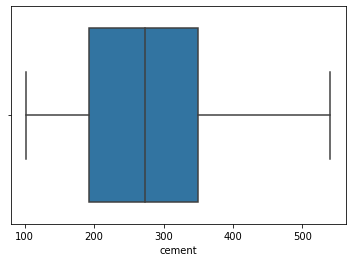

In [13]:
sns.boxplot(x= 'cement', data = df, orient = 'h')

**For slag**

In [14]:
Q1 = df['slag'].quantile(q = 0.25)
Q3 = df['slag'].quantile(q = 0.75)
print('first Quartile is ', Q1)
print('third Quartile is ', Q3)
print('Interquartile range (IQR) is', stats.iqr(df['slag']))

first Quartile is  0.0
third Quartile is  142.95
Interquartile range (IQR) is 142.95


In [15]:
Lower_outlier = Q1 - 1.5*(Q3 - Q1)
Upper_outlier = Q3 + 1.5*(Q3 - Q1)

print('Lower outlier Limit in slag is ', Lower_outlier)
print('Upper outlier Limit in slag is ', Upper_outlier)

Lower outlier Limit in slag is  -214.42499999999998
Upper outlier Limit in slag is  357.375


In [16]:
print('Number of Upper outliers in slag is ', df[df['slag'] > 357]['slag'].count())
print('Number of Lower outliers in slag is ', df[df['slag'] < -214]['slag'].count())

Number of Upper outliers in slag is  2
Number of Lower outliers in slag is  0


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='slag'>

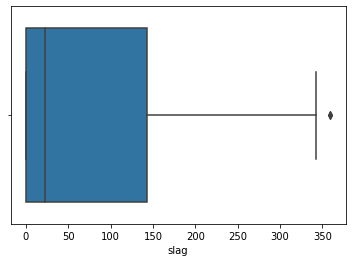

In [17]:
sns.boxplot(x= 'slag', data = df, orient = 'h')

**For ash**

In [18]:
Q1 = df['ash'].quantile(q = 0.25)
Q3 = df['ash'].quantile(q = 0.75)
print('first Quartile is ', Q1)
print('third Quartile is ', Q3)
print('Interquartile range (IQR) is', stats.iqr(df['ash']))
print()

Lower_outlier = Q1 - 1.5*(Q3 - Q1)
Upper_outlier = Q3 + 1.5*(Q3 - Q1)

print('Lower outlier Limit in ash is ', Lower_outlier)
print('Upper outlier Limit in ash is ', Upper_outlier)

first Quartile is  0.0
third Quartile is  118.3
Interquartile range (IQR) is 118.3

Lower outlier Limit in ash is  -177.45
Upper outlier Limit in ash is  295.75


In [19]:
print('Number of Upper outliers in ash is ', df[df['ash'] > 295]['ash'].count())
print('Number of Lower outliers in ash is ', df[df['ash'] < -177]['ash'].count())

Number of Upper outliers in ash is  0
Number of Lower outliers in ash is  0


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='ash'>

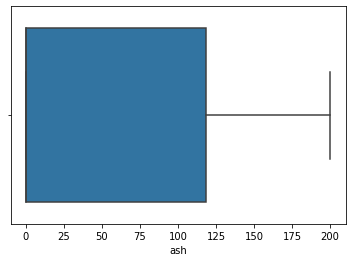

In [20]:

sns.boxplot(x= 'ash', data = df, orient = 'h')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

c:\users\abhis\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Ash')

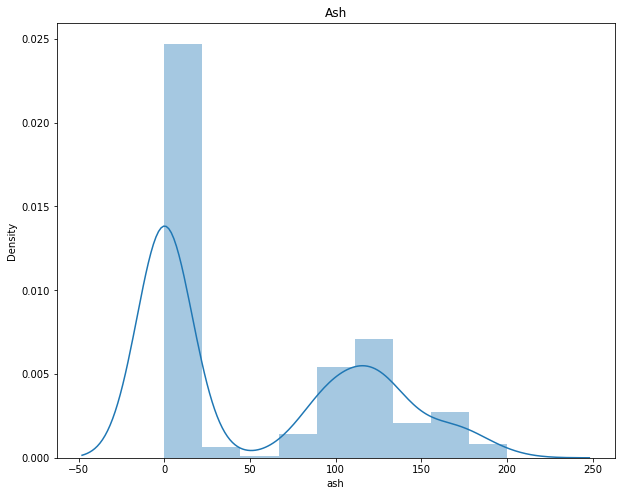

In [21]:
plt.figure(figsize = (10, 8))
sns.distplot(df['ash']).set_title('Ash')

**For water**

In [22]:
Q1 = df['water'].quantile(q = 0.25)
Q3 = df['water'].quantile(q = 0.75)
print('first Quartile is ', Q1)
print('third Quartile is ', Q3)
print('Interquartile range (IQR) is', stats.iqr(df['water']))
print()

Lower_outlier = Q1 - 1.5*(Q3 - Q1)
Upper_outlier = Q3 + 1.5*(Q3 - Q1)

print('Lower outlier Limit in water is ', Lower_outlier)
print('Upper outlier Limit in water is ', Upper_outlier)

first Quartile is  164.9
third Quartile is  192.0
Interquartile range (IQR) is 27.099999999999994

Lower outlier Limit in water is  124.25000000000001
Upper outlier Limit in water is  232.64999999999998


In [23]:
print('Number of Upper outliers in water is ', df[df['water'] > 232]['water'].count())
print('Number of Lower outliers in water is ', df[df['water'] < 124]['water'].count())

Number of Upper outliers in water is  4
Number of Lower outliers in water is  5


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='water'>

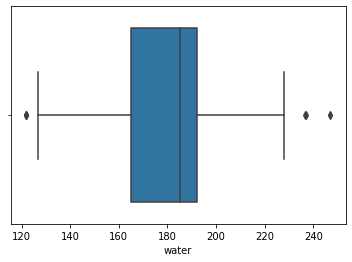

In [24]:
sns.boxplot(x= 'water', data = df, orient = 'h')

**For superplasticizer**

In [25]:
Q1 = df['superplasticizer'].quantile(q = 0.25)
Q3 = df['superplasticizer'].quantile(q = 0.75)
print('first Quartile is ', Q1)
print('third Quartile is ', Q3)
print('Interquartile range (IQR) is', stats.iqr(df['superplasticizer']))
print()

Lower_outlier = Q1 - 1.5*(Q3 - Q1)
Upper_outlier = Q3 + 1.5*(Q3 - Q1)

print('Lower outlier Limit in superplasticizer is ', Lower_outlier)
print('Upper outlier Limit in superplasticizer is ', Upper_outlier)

first Quartile is  0.0
third Quartile is  10.2
Interquartile range (IQR) is 10.2

Lower outlier Limit in superplasticizer is  -15.299999999999999
Upper outlier Limit in superplasticizer is  25.5


In [26]:
print('Number of Upper outliers in superplasticizer is ', df[df['superplasticizer'] > 25]['superplasticizer'].count())
print('Number of Lower outliers in superplasticizer is ', df[df['superplasticizer'] < -15]['superplasticizer'].count())

Number of Upper outliers in superplasticizer is  10
Number of Lower outliers in superplasticizer is  0


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='superplasticizer'>

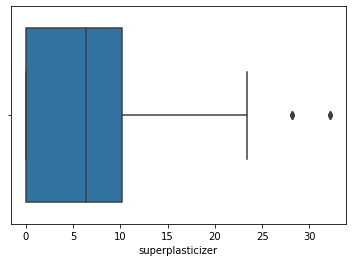

In [27]:
sns.boxplot(x= 'superplasticizer', data = df, orient = 'h')

**For coarseagg**

In [28]:
Q1 = df['coarseagg'].quantile(q = 0.25)
Q3 = df['coarseagg'].quantile(q = 0.75)
print('first Quartile is ', Q1)
print('third Quartile is ', Q3)
print('Interquartile range (IQR) is', stats.iqr(df['coarseagg']))
print()

Lower_outlier = Q1 - 1.5*(Q3 - Q1)
Upper_outlier = Q3 + 1.5*(Q3 - Q1)

print('Lower outlier Limit in coarseagg is ', Lower_outlier)
print('Upper outlier Limit in coarseagg is ', Upper_outlier)

first Quartile is  932.0
third Quartile is  1029.4
Interquartile range (IQR) is 97.40000000000009

Lower outlier Limit in coarseagg is  785.8999999999999
Upper outlier Limit in coarseagg is  1175.5000000000002


In [29]:
print('Number of Upper outliers in coarseagg is ', df[df['coarseagg'] > 1175]['coarseagg'].count())
print('Number of Lower outliers in coarseagg is ', df[df['coarseagg'] < 785]['coarseagg'].count())

Number of Upper outliers in coarseagg is  0
Number of Lower outliers in coarseagg is  0


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='coarseagg'>

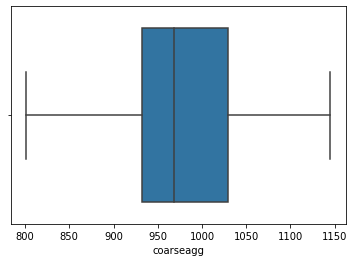

In [30]:
sns.boxplot(x= 'coarseagg', data = df, orient = 'h')

**For fineagg**

In [31]:
Q1 = df['fineagg'].quantile(q = 0.25)
Q3 = df['fineagg'].quantile(q = 0.75)
print('first Quartile is ', Q1)
print('third Quartile is ', Q3)
print('Interquartile range (IQR) is', stats.iqr(df['fineagg']))
print()

Lower_outlier = Q1 - 1.5*(Q3 - Q1)
Upper_outlier = Q3 + 1.5*(Q3 - Q1)

print('Lower outlier Limit in fineagg is ', Lower_outlier)
print('Upper outlier Limit in fineagg is ', Upper_outlier)

first Quartile is  730.95
third Quartile is  824.0
Interquartile range (IQR) is 93.04999999999995

Lower outlier Limit in fineagg is  591.3750000000001
Upper outlier Limit in fineagg is  963.5749999999999


In [32]:
print('Number of Upper outliers in fineagg is ', df[df['fineagg'] > 963]['fineagg'].count())
print('Number of Lower outliers in fineagg is ', df[df['fineagg'] < 591]['fineagg'].count())

Number of Upper outliers in fineagg is  5
Number of Lower outliers in fineagg is  0


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='fineagg'>

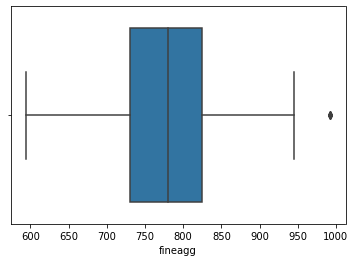

In [33]:
sns.boxplot(x= 'fineagg', data = df, orient = 'h')

**For age**

In [34]:
Q1 = df['age'].quantile(q = 0.25)
Q3 = df['age'].quantile(q = 0.75)
print('first Quartile is ', Q1)
print('third Quartile is ', Q3)
print('Interquartile range (IQR) is', stats.iqr(df['age']))
print()

Lower_outlier = Q1 - 1.5*(Q3 - Q1)
Upper_outlier = Q3 + 1.5*(Q3 - Q1)

print('Lower outlier Limit in age is ', Lower_outlier)
print('Upper outlier Limit in age is ', Upper_outlier)

first Quartile is  7.0
third Quartile is  56.0
Interquartile range (IQR) is 49.0

Lower outlier Limit in age is  -66.5
Upper outlier Limit in age is  129.5


In [35]:
print('Number of Upper outliers in age is ', df[df['age'] > 129]['age'].count())
print('Number of Lower outliers in age is ', df[df['age'] < -66]['age'].count())

Number of Upper outliers in age is  59
Number of Lower outliers in age is  0


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='age'>

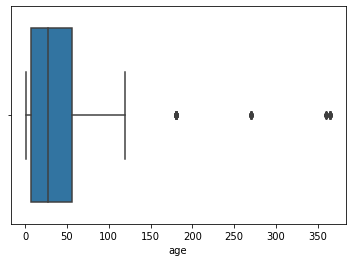

In [36]:
sns.boxplot(x= 'age', data = df, orient = 'h')

## Model Building

In [37]:
X = df.drop('strength', axis = 1)
y = df['strength']

In [38]:
from scipy.stats import zscore

In [39]:
x_trans = X.apply(zscore)
x_trans_df = pd.DataFrame(x_trans, columns = df.columns)

<IPython.core.display.Javascript object>

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x_trans, y, test_size = 0.25, random_state = 1)

<IPython.core.display.Javascript object>

**Random Forest Regressor**

In [41]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

<IPython.core.display.Javascript object>

RandomForestRegressor()

In [42]:
x_test

,cement,slag,ash,water,superplasticizer,coarseagg,fineagg,age
339,0.153483,-0.856888,0.989771,-0.317060,0.551896,0.641836,-0.250577,-0.675683
244,-0.412308,-0.856888,0.623952,0.240478,0.133202,-0.296192,0.916174,-0.675683
882,-1.351463,0.685366,0.763088,0.863608,0.133202,-0.732395,-0.256816,-0.279733
567,-0.743549,0.716674,-0.847144,0.193626,-1.039143,1.328952,-0.178201,-0.612331
923,-1.140847,1.543461,1.841787,1.613238,0.635635,-1.941924,-1.691858,-0.279733
...,...,...,...,...,...,...,...,...
779,0.132421,-0.856888,-0.847144,0.160829,-1.039143,1.236307,-0.057158,-0.279733
529,0.745122,-0.636566,1.357155,-1.291580,0.786365,-0.397844,0.342158,0.163731
713,-1.188714,1.879742,-0.847144,0.488793,-1.039143,-0.482768,0.095081,-0.675683
787,0.477065,-0.856888,-0.847144,0.488793,-1.039143,0.065380,0.641645,0.702224


In [43]:
y_pred = model.predict(x_test)
y_pred

array([21.9581    , 13.1112    , 31.6264    , 11.7263    , 31.8595    ,
       63.1177    , 18.9409    , 49.186     , 39.4615    , 18.3335    ,
       37.6825    , 13.0668    , 38.8098    , 33.1403    , 11.8004    ,
       28.3736    , 37.9298    , 53.9559    , 59.2367    , 33.2533    ,
       25.5493    , 51.7471    , 16.3966    , 58.458275  , 64.5143    ,
       42.4542    , 35.1702    , 35.5018    , 35.3504    , 12.9557    ,
       41.9097    , 51.2955    , 26.6985    , 21.2117    , 35.513825  ,
       36.7592    , 15.9079    , 27.0206    , 24.3437    , 11.0847    ,
       34.3178    , 15.1772    , 46.6236    , 36.3265    , 32.41013333,
       28.3833    , 31.8507    , 24.8247    , 33.698725  , 50.6299    ,
       26.2573    , 37.2421    , 59.1767    , 52.1881    , 60.5371    ,
        9.4743    , 31.9842    , 24.835     , 33.8604    , 43.3493    ,
       49.8873    , 42.6755    , 50.4094    , 49.4078    , 26.939     ,
       34.8806    , 55.2258    , 39.0763    , 46.3464    , 28.14

In [44]:
model.score(x_train, y_train)

0.9834614861760518

In [45]:
import sklearn.metrics as metrics

In [46]:
accuracy = metrics.r2_score(y_test, y_pred)
results = pd.DataFrame({'Algorithm': ['Random Forest Regressor'],
                      'Accuracy': accuracy})
results = results[['Algorithm', 'Accuracy']]
results

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
0,Random Forest Regressor,0.895577


#### KFold cross validation

In [47]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [48]:
# KFold cross validation

k = 20
kfold = KFold(n_splits = k, random_state = 10, shuffle=True)
k_result = cross_val_score(model, X, y, cv = kfold)
k_accuracy = np.mean(abs(k_result))
#k_accuracy

data = pd.DataFrame({'Algorithm': ['Random Forest Regressor KFold'], 
                    'Accuracy': k_accuracy}, index = {1})

results = pd.concat([results, data])
results = results[['Algorithm', 'Accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
0,Random Forest Regressor,0.895577
1,Random Forest Regressor KFold,0.916420


In [49]:
results_df  = results.copy(deep = True)

**Gradient Boosting Regressor**

In [50]:
model = GradientBoostingRegressor()
model.fit(x_train, y_train)

<IPython.core.display.Javascript object>

GradientBoostingRegressor()

In [51]:
y_pred = model.predict(x_test)
y_pred

array([20.05547243, 13.35773599, 25.17874552, 11.34237117, 33.39848476,
       63.78009299, 18.12720496, 47.49648625, 39.45377533, 20.51925525,
       37.7423308 , 13.67760406, 38.3157714 , 30.84218147,  8.2751939 ,
       28.06419339, 39.21917914, 59.94733549, 55.95121754, 35.07727813,
       22.64140609, 52.08540334, 17.16950448, 60.95890995, 60.61975103,
       39.72980203, 33.76002196, 31.6614234 , 35.65615301, 13.37877001,
       42.49942576, 54.71450523, 26.97714156, 25.1844962 , 34.28287275,
       38.51748767, 15.8566619 , 27.26732481, 25.11773583, 14.67662299,
       38.46578944, 14.52696985, 47.81064594, 36.22227688, 34.90285072,
       27.99527408, 32.92306041, 27.17598997, 34.30690003, 52.34616727,
       25.8915991 , 36.49391418, 62.0727361 , 52.21934225, 57.45438523,
        9.39092959, 37.66077896, 23.56901584, 31.85329066, 44.58527068,
       49.62712796, 42.41219958, 53.40668269, 49.04826392, 23.02591704,
       34.97467607, 50.46903323, 35.13284257, 39.90153769, 27.69

In [52]:
model.score(x_train, y_train)

0.9525838866970711

In [53]:
accuracy = metrics.r2_score(y_test, y_pred)
results = pd.DataFrame({'Algorithm': ['GradientBoosting Regressor'],
                      'Accuracy': accuracy}, index = {2})
results = results[['Algorithm', 'Accuracy']]
results

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
2,GradientBoosting Regressor,0.895237


In [54]:
# KFold cross validation

k = 20
kfold = KFold(n_splits = k, random_state = 10, shuffle=True)
k_result = cross_val_score(model, X, y, cv = kfold)
k_accuracy = np.mean(abs(k_result))
#k_accuracy

data = pd.DataFrame({'Algorithm': ['GradientBoosting Regressor KFold'], 
                    'Accuracy': k_accuracy}, index = {3})

results = pd.concat([results, data])
results = results[['Algorithm', 'Accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
2,GradientBoosting Regressor,0.895237
3,GradientBoosting Regressor KFold,0.902362


In [55]:
results_df = pd.concat([results_df, results])

<IPython.core.display.Javascript object>

**AdaBoosting Regressor**

In [56]:
from sklearn.ensemble import AdaBoostRegressor

In [57]:
model = AdaBoostRegressor()
model.fit(x_train, y_train)

AdaBoostRegressor()

In [58]:
y_pred = model.predict(x_test)
y_pred

array([24.90636364, 18.08826087, 27.64294872, 16.13246479, 30.61846154,
       57.55730159, 23.45898305, 46.34801887, 43.43958333, 20.00746667,
       40.88204082, 19.04075472, 40.98508287, 30.18478022, 20.08809524,
       30.18478022, 43.06048611, 48.19954545, 59.48333333, 34.95402542,
       24.13151786, 44.65653846, 21.41671141, 64.51351585, 61.11973684,
       40.98508287, 32.10046154, 37.58551724, 38.30368421, 19.04075472,
       47.17126437, 55.96027027, 30.18478022, 26.13571429, 39.10342466,
       38.30368421, 20.90618357, 32.10046154, 31.52913043, 15.82968   ,
       39.388     , 20.56887324, 49.23299465, 43.06048611, 33.61152542,
       30.18478022, 38.30368421, 32.10046154, 36.13151515, 44.65653846,
       29.53892216, 33.41674033, 48.79661017, 46.70333333, 57.85804348,
       17.70895349, 37.67766234, 24.13151786, 36.4535    , 43.38680965,
       44.1034375 , 47.17126437, 46.34801887, 44.1034375 , 27.90622222,
       32.10046154, 47.79875839, 32.44842809, 44.87307692, 26.97

In [59]:
model.score(x_train, y_train)

0.8274519539625013

In [60]:
accuracy = metrics.r2_score(y_test, y_pred)
results = pd.DataFrame({'Algorithm': ['AdaBoosting Regressor'],
                      'Accuracy': accuracy}, index = {4})
results = results[['Algorithm', 'Accuracy']]
results

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
4,AdaBoosting Regressor,0.777865


In [61]:
# KFold cross validation

k = 20
kfold = KFold(n_splits = k, random_state = 10, shuffle=True)
k_result = cross_val_score(model, X, y, cv = kfold)
k_accuracy = np.mean(abs(k_result))
#k_accuracy

data = pd.DataFrame({'Algorithm': ['AdaBoosting Regressor KFold'], 
                    'Accuracy': k_accuracy}, index = {5})

results = pd.concat([results, data])
results = results[['Algorithm', 'Accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
4,AdaBoosting Regressor,0.777865
5,AdaBoosting Regressor KFold,0.783261


In [62]:
results_df = pd.concat([results_df, results])

<IPython.core.display.Javascript object>

**KNeighbors Regressor**

In [63]:
from sklearn.neighbors import KNeighborsRegressor

In [64]:
model = KNeighborsRegressor()
model.fit(x_train, y_train)

KNeighborsRegressor()

In [65]:
y_pred = model.predict(x_test)
y_pred

array([35.01 , 20.63 , 26.174, 16.026, 32.776, 56.352, 23.272, 49.01 ,
       36.678, 29.852, 29.238, 13.79 , 37.612, 25.424, 13.258, 20.856,
       44.914, 52.856, 45.648, 42.652, 22.598, 42.35 , 18.038, 53.926,
       60.598, 49.52 , 34.412, 37.41 , 39.864, 20.038, 48.97 , 37.214,
       18.27 , 29.398, 48.258, 38.336, 16.368, 24.21 , 26.842, 30.056,
       57.62 , 14.474, 38.928, 36.322, 38.572, 33.17 , 29.776, 25.776,
       51.196, 46.448, 22.946, 36.054, 64.466, 64.466, 51.538, 16.65 ,
       57.716, 25.426, 38.422, 37.516, 49.912, 46.814, 47.958, 52.07 ,
       26.496, 38.928, 41.13 , 33.734, 37.906, 26.734, 47.54 , 23.478,
       38.336, 13.198, 45.648, 56.28 , 58.8  , 28.056, 37.214, 44.328,
       37.812, 51.196, 53.144, 25.024, 39.238, 50.7  , 30.946, 58.756,
       48.458, 53.38 , 30.908, 37.49 , 26.492, 38.572, 49.542, 61.238,
       32.92 , 22.598, 18.578, 38.306, 42.24 , 53.584, 35.582, 50.198,
       38.696, 35.434, 25.96 , 34.044, 18.918, 27.4  , 18.424, 18.866,
      

In [66]:
model.score(x_train, y_train)

0.8361887222703014

In [67]:
accuracy = metrics.r2_score(y_test, y_pred)
results = pd.DataFrame({'Algorithm': ['KNeighbors Regressor'],
                      'Accuracy': accuracy}, index = {6})
results = results[['Algorithm', 'Accuracy']]
results

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
6,KNeighbors Regressor,0.67677


In [68]:
# KFold cross validation

k = 20
kfold = KFold(n_splits = k, random_state = 10, shuffle=True)
k_result = cross_val_score(model, X, y, cv = kfold)
k_accuracy = np.mean(abs(k_result))
#k_accuracy

data = pd.DataFrame({'Algorithm': ['KNeighbors Regressor KFold'], 
                    'Accuracy': k_accuracy}, index = {7})

results = pd.concat([results, data])
results = results[['Algorithm', 'Accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
6,KNeighbors Regressor,0.676770
7,KNeighbors Regressor KFold,0.711765


In [69]:
results_df = pd.concat([results_df, results])

<IPython.core.display.Javascript object>

**Bagging Regressor**

In [70]:
from sklearn.ensemble import BaggingRegressor

In [71]:
model = BaggingRegressor()
model.fit(x_train, y_train)

BaggingRegressor()

In [72]:
y_pred = model.predict(x_test)
y_pred

array([18.277     , 13.402     , 29.036     , 10.478     , 30.106     ,
       60.391     , 18.572     , 50.5       , 40.963     , 18.893     ,
       36.629     , 13.707     , 39.689     , 33.911     , 11.821     ,
       26.951     , 36.8       , 53.258     , 59.798     , 29.567     ,
       27.408     , 49.33      , 15.655     , 58.27      , 59.365     ,
       45.988     , 27.834     , 33.038     , 33.082     , 13.213     ,
       41.218     , 51.74466667, 25.721     , 20.605     , 35.26      ,
       36.697     , 14.601     , 30.78      , 29.775     , 12.322     ,
       29.976     , 15.4       , 47.828     , 34.909     , 30.77      ,
       25.088     , 31.852     , 24.823     , 31.134     , 47.578     ,
       25.34      , 36.778     , 59.775     , 52.035     , 62.268     ,
        9.189     , 29.252     , 24.534     , 34.747     , 43.916     ,
       49.954     , 42.893     , 51.54      , 50.393     , 26.391     ,
       34.425     , 55.738     , 37.824     , 51.205     , 28.92

In [73]:
model.score(x_train, y_train)

0.9751990446350882

In [74]:
accuracy = metrics.r2_score(y_test, y_pred)
results = pd.DataFrame({'Algorithm': ['Bagging Regressor'],
                      'Accuracy': accuracy}, index = {8})
results = results[['Algorithm', 'Accuracy']]
results

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
8,Bagging Regressor,0.877553


In [75]:
# KFold cross validation

k = 20
kfold = KFold(n_splits = k, random_state = 10, shuffle=True)
k_result = cross_val_score(model, X, y, cv = kfold)
k_accuracy = np.mean(abs(k_result))
#k_accuracy

data = pd.DataFrame({'Algorithm': ['Bagging Regressor KFold'], 
                    'Accuracy': k_accuracy}, index = {9})

results = pd.concat([results, data])
results = results[['Algorithm', 'Accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
8,Bagging Regressor,0.877553
9,Bagging Regressor KFold,0.904520


In [76]:
results_df = pd.concat([results_df, results])

<IPython.core.display.Javascript object>

**Support vector regressor**

In [77]:
from sklearn.svm import SVR

In [78]:
model = SVR(kernel = 'linear')
model.fit(x_train, y_train)

SVR(kernel='linear')

In [79]:
y_pred = model.predict(x_test)
y_pred

array([32.33295771, 21.4845561 , 22.77571059, 20.61683251, 34.08590839,
       50.95498089, 24.19108243, 47.1934724 , 32.22390698, 37.13212553,
       47.97209408, 18.32363834, 28.37725532, 27.9732508 , 12.50232858,
       25.08055974, 67.00134969, 46.97252639, 50.76721552, 34.14245906,
       23.4864574 , 38.92341346, 23.18549386, 45.93402368, 59.36777574,
       33.41993331, 31.60312668, 27.68040555, 33.12729442, 23.58720829,
       86.57144934, 52.91586648, 24.07133508, 33.68746448, 55.31272482,
       34.12807507, 24.68896914, 23.82313865, 29.55420583, 27.49062363,
       51.94569333, 24.73293821, 53.07147986, 37.28687724, 33.95160611,
       33.38550077, 27.62534419, 27.8953942 , 50.51792218, 39.44314731,
       22.81567963, 34.21061778, 73.45975055, 68.59180039, 60.03219995,
       18.70317657, 47.81487562, 24.42876521, 25.73472695, 34.34815308,
       73.4205678 , 87.88564535, 52.85083516, 43.81015591, 32.84668842,
       40.74223743, 48.45573196, 33.8930128 , 32.0543685 , 27.00

In [80]:
model.score(x_train, y_train)

0.5932526147204562

In [81]:
accuracy = metrics.r2_score(y_test, y_pred)
results = pd.DataFrame({'Algorithm': ['Support vector regressor'],
                      'Accuracy': accuracy}, index = {10})
results = results[['Algorithm', 'Accuracy']]
results

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
10,Support vector regressor,0.481796


In [82]:
metrics.mean_squared_error(y_test, y_pred)

138.22486084222464

In [83]:
# KFold cross validation

k = 20
kfold = KFold(n_splits = k, random_state = 10, shuffle=True)
k_result = cross_val_score(model, X, y, cv = kfold)
k_accuracy = np.mean(abs(k_result))
#k_accuracy

data = pd.DataFrame({'Algorithm': ['Support vector regressor KFold'], 
                    'Accuracy': k_accuracy}, index = {11})

results = pd.concat([results, data])
results = results[['Algorithm', 'Accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
10,Support vector regressor,0.481796
11,Support vector regressor KFold,0.550172


In [84]:
results_df = pd.concat([results_df, results])

<IPython.core.display.Javascript object>

**XG Boost Regressor**

In [85]:
#! pip install xgboost

In [86]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [87]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [88]:
y_pred = xgb.predict(x_test)
y_pred

array([24.760424 , 13.256351 , 34.897655 , 15.822304 , 32.438786 ,
       68.70487  , 18.652279 , 50.84954  , 39.35378  , 18.109987 ,
       38.937717 , 11.696493 , 36.197098 , 34.933712 , 12.051855 ,
       27.206778 , 37.071625 , 56.536476 , 61.336956 , 37.513927 ,
       23.146072 , 50.467846 , 19.33746  , 66.12136  , 62.805664 ,
       46.71372  , 39.643044 , 31.153734 , 37.261974 , 13.646238 ,
       40.60827  , 51.841675 , 28.522396 , 21.752884 , 33.535362 ,
       36.20633  , 17.699453 , 26.492151 , 24.49432  , 14.795337 ,
       33.202404 , 14.098603 , 46.869698 , 38.064507 , 35.966103 ,
       25.159565 , 33.33403  , 30.770157 , 29.107536 , 48.63681  ,
       25.586798 , 36.41383  , 62.45654  , 55.86361  , 55.391876 ,
        8.725548 , 35.17478  , 25.670803 , 35.23299  , 44.58282  ,
       51.17141  , 42.165947 , 53.97605  , 52.402775 , 21.874727 ,
       33.792606 , 53.83014  , 38.627346 , 45.486763 , 24.857933 ,
       36.381474 , 27.011112 , 36.20633  , 10.156318 , 73.3131

In [89]:
model.score(x_train, y_train)

0.5932526147204562

In [90]:
accuracy = metrics.r2_score(y_test, y_pred)
results = pd.DataFrame({'Algorithm': ['XG Boost Regressor'],
                      'Accuracy': accuracy}, index = {12})
results = results[['Algorithm', 'Accuracy']]
results

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
12,XG Boost Regressor,0.919621


In [91]:
# KFold cross validation

k = 20
kfold = KFold(n_splits = k, random_state = 10, shuffle=True)
k_result = cross_val_score(xgb, X, y, cv = kfold)
k_accuracy = np.mean(abs(k_result))
#k_accuracy

data = pd.DataFrame({'Algorithm': ['XG Boost Regressor KFold'], 
                    'Accuracy': k_accuracy}, index = {13})

results = pd.concat([results, data])
results = results[['Algorithm', 'Accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
12,XG Boost Regressor,0.919621
13,XG Boost Regressor KFold,0.929891


In [92]:
results_df = pd.concat([results_df, results])

<IPython.core.display.Javascript object>

**Decision Tree Regressor**

In [93]:
from sklearn.tree import DecisionTreeRegressor

In [94]:
dec_model = DecisionTreeRegressor()
dec_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [95]:
print('Feature importances : \n', pd.DataFrame(dec_model.feature_importances_, columns = ['Importance'], index = x_train.columns))

<IPython.core.display.Javascript object>

Feature importances : 
                   Importance
cement              0.362110
slag                0.075516
ash                 0.011348
water               0.119065
superplasticizer    0.021813
coarseagg           0.043324
fineagg             0.031299
age                 0.335526


In [96]:
y_pred = dec_model.predict(x_test)
y_pred

array([23.8  , 13.18 , 36.44 , 13.09 , 30.88 , 66.42 , 14.2  , 50.95 ,
       39.05 , 17.2  , 37.68 , 13.09 , 36.8  , 35.23 , 12.05 , 26.86 ,
       36.25 , 59.3  , 53.58 , 34.67 , 24.28 , 51.43 , 16.26 , 81.75 ,
       68.5  , 46.24 , 41.2  , 35.08 , 32.05 , 13.12 , 41.15 , 50.24 ,
       45.71 , 27.42 , 33.4  , 32.4  , 15.69 , 27.83 , 25.56 , 13.12 ,
       38.   , 15.05 , 39.42 , 40.06 , 34.67 , 29.72 , 31.84 , 23.7  ,
       35.3  , 50.08 , 27.66 , 37.91 , 58.78 , 55.16 , 61.215,  9.31 ,
       35.1  , 22.72 , 39.36 , 47.74 , 50.66 , 43.01 , 54.32 , 56.81 ,
       25.56 , 33.76 , 58.78 , 41.2  , 55.55 , 24.28 , 41.3  , 24.9  ,
       32.4  ,  9.74 , 64.9  , 62.05 , 46.9  , 21.92 , 55.2  , 53.52 ,
       33.08 , 46.2  , 55.26 , 45.71 , 26.77 , 49.2  , 33.7  , 55.2  ,
       51.73 , 57.21 , 36.35 , 31.18 , 24.85 , 36.8  , 32.01 , 71.7  ,
       41.05 , 12.18 , 25.73 , 24.4  , 32.05 , 61.07 , 39.27 , 33.4  ,
       50.53 , 32.1  , 33.27 , 39.7  , 12.18 , 24.   , 19.69 , 45.71 ,
      

In [97]:
dec_model.score(x_train, y_train)

0.9954416123060688

In [98]:
dec_model.score(x_test, y_test)

0.8220013316028548

In [99]:
accuracy = metrics.r2_score(y_test, y_pred)
results = pd.DataFrame({'Algorithm': ['DecisionTree Regressor'],
                      'Accuracy': accuracy}, index = {14})
results = results[['Algorithm', 'Accuracy']]
results

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
14,DecisionTree Regressor,0.822001


In [100]:
# KFold cross validation

k = 20
kfold = KFold(n_splits = k, random_state = 10, shuffle=True)
k_result = cross_val_score(dec_model, X, y, cv = kfold)
k_accuracy = np.mean(abs(k_result))
#k_accuracy

data = pd.DataFrame({'Algorithm': ['DecisionTree Regressor KFold'], 
                    'Accuracy': k_accuracy}, index = {15})

results = pd.concat([results, data])
results = results[['Algorithm', 'Accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
14,DecisionTree Regressor,0.822001
15,DecisionTree Regressor KFold,0.864506


In [101]:
results_df = pd.concat([results_df, results])

<IPython.core.display.Javascript object>

**Feature elimination**

In [102]:
new_df = df.copy()

In [103]:
X = new_df.drop(['strength', 'ash', 'superplasticizer', 'coarseagg', 'fineagg'], axis = 1)
y = new_df['strength']

In [104]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

<IPython.core.display.Javascript object>

In [105]:
x_train = x_train.apply(zscore)
x_test = x_test.apply(zscore)

In [106]:
new_dec_model = DecisionTreeRegressor()
new_dec_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [107]:
y_pred = new_dec_model.predict(x_test)
y_pred

array([21.26      , 36.15      , 64.02      , 13.2       , 41.54      ,
        7.32      , 21.92      , 40.93      , 64.02      , 48.4       ,
       30.85      , 37.27      , 29.23      , 22.84      , 21.06      ,
       25.1       , 52.91      , 65.2       , 45.94      , 33.4       ,
       15.30333333, 61.215     , 74.7       , 41.05      , 25.69      ,
       19.77      , 29.23      , 33.05      , 54.9       , 27.74      ,
       11.39      , 17.96      , 22.49      ,  7.68      , 15.57      ,
       63.14      , 67.31      , 15.58      , 21.75      , 20.73      ,
       38.56      , 44.64      , 19.69      , 23.69      , 59.89      ,
       40.93      , 23.51      , 38.46      , 23.69      , 23.69      ,
       19.99      , 39.        , 61.215     , 33.76      , 41.3       ,
       39.58      , 18.02      , 44.86      , 33.05      , 18.02      ,
       19.35      , 27.04      , 10.03      , 21.91      , 20.28      ,
       57.21      , 28.99      ,  9.45      , 48.99      , 11.36

In [108]:
new_dec_model.score(x_train, y_train)

0.9938787026138576

In [109]:
new_dec_model.score(x_test, y_test)

0.6934053416457788

In [110]:
accuracy = metrics.r2_score(y_test, y_pred)
results = pd.DataFrame({'Algorithm': ['new DecisionTree Regressor'],
                      'Accuracy': accuracy}, index = {16})
results = results[['Algorithm', 'Accuracy']]
results

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
16,new DecisionTree Regressor,0.693405


In [111]:
# KFold cross validation

k = 20
kfold = KFold(n_splits = k, random_state = 10, shuffle=True)
k_result = cross_val_score(new_dec_model, X, y, cv = kfold)
k_accuracy = np.mean(abs(k_result))
#k_accuracy

data = pd.DataFrame({'Algorithm': ['new DecisionTree Regressor KFold'], 
                    'Accuracy': k_accuracy}, index = {17})

results = pd.concat([results, data])
results = results[['Algorithm', 'Accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
16,new DecisionTree Regressor,0.693405
17,new DecisionTree Regressor KFold,0.858617


In [112]:
results_df = pd.concat([results_df, results])

<IPython.core.display.Javascript object>

In [113]:
X = df.drop('strength', axis =1)
y = df['strength']

In [114]:
x_scaled = X.apply(zscore)
x_scaled_df = pd.DataFrame(x_scaled, columns = df.columns)

<IPython.core.display.Javascript object>

In [115]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)

<IPython.core.display.Javascript object>

In [116]:
dec_prun_model = DecisionTreeRegressor(max_depth = 4, random_state = 1, min_samples_leaf = 5)
dec_prun_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=1)

In [117]:
print('Feature importances : \n', pd.DataFrame(dec_prun_model.feature_importances_, columns = ['Importance'], index = x_train.columns))

<IPython.core.display.Javascript object>

Feature importances : 
                   Importance
cement              0.421611
slag                0.101419
ash                 0.000000
water               0.067462
superplasticizer    0.023748
coarseagg           0.000000
fineagg             0.000000
age                 0.385760


In [118]:
#! pip install graphviz

You should consider upgrading via the 'c:\users\abhis\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [119]:
#! pip install pydot

You should consider upgrading via the 'c:\users\abhis\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [120]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import graphviz
import pydot

In [121]:
x_scaled_df = x_scaled_df.drop('strength', axis = 1)
feature_cols = x_scaled_df.columns
feature_cols

Index(['cement', 'slag', 'ash', 'water', 'superplasticizer', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')

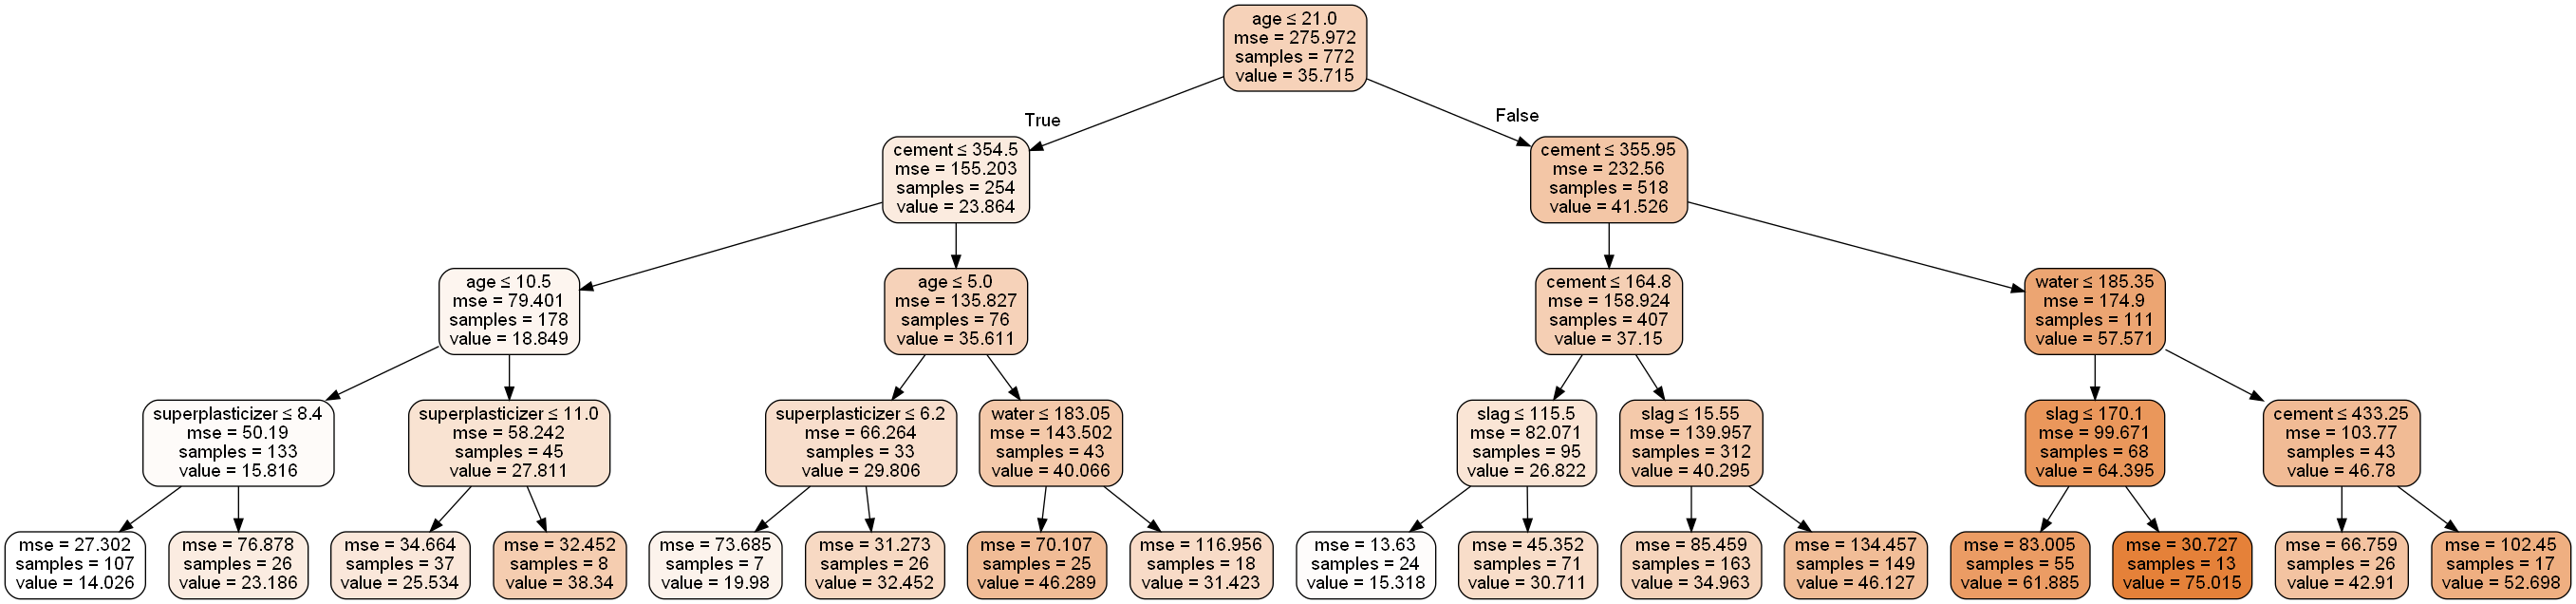

In [122]:
dot_data = StringIO()  
export_graphviz(dec_prun_model, 
                out_file = dot_data, filled = True, 
                rounded = True, special_characters = True, 
                feature_names = feature_cols, 
                class_names = ['0', '1'])
#(graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())
graph, = pydot.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Concrete_pruned.png')
Image(graph.create_png()) 

In [123]:
y_pred = dec_prun_model.predict(x_test)
y_pred

array([14.02560748, 15.31833333, 14.02560748, 25.53405405, 46.12738255,
       34.96282209, 14.02560748, 46.12738255, 14.02560748, 46.12738255,
       34.96282209, 52.69764706, 46.12738255, 34.96282209, 34.96282209,
       61.88472727, 30.71056338, 34.96282209, 19.98      , 46.12738255,
       52.69764706, 61.88472727, 52.69764706, 34.96282209, 14.02560748,
       30.71056338, 34.96282209, 34.96282209, 46.12738255, 14.02560748,
       61.88472727, 31.42333333, 30.71056338, 42.91      , 61.88472727,
       46.12738255, 30.71056338, 15.31833333, 30.71056338, 34.96282209,
       30.71056338, 34.96282209, 52.69764706, 14.02560748, 30.71056338,
       46.2892    , 34.96282209, 19.98      , 14.02560748, 19.98      ,
       30.71056338, 61.88472727, 34.96282209, 31.42333333, 14.02560748,
       14.02560748, 30.71056338, 30.71056338, 34.96282209, 34.96282209,
       46.12738255, 61.88472727, 34.96282209, 46.12738255, 61.88472727,
       30.71056338, 25.53405405, 34.96282209, 46.12738255, 61.88

In [124]:
dec_prun_model.score(x_train, y_train)

0.7296318382811564

In [125]:
dec_prun_model.score(x_test, y_test)

0.6608111562223243

In [126]:
dec_prun_acc  = metrics.r2_score(y_test, y_pred)
dec_prun_acc

0.6608111562223243

In [127]:
metrics.mean_squared_error(y_test, y_pred)

97.40737519209208

In [128]:
dec_df = pd.DataFrame({'Algorithm': ['pruned decision tree'], 'Accuracy': dec_prun_acc}, index = {18})

results = pd.concat([results, dec_df])
results = results[['Algorithm', 'Accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
16,new DecisionTree Regressor,0.693405
17,new DecisionTree Regressor KFold,0.858617
18,pruned decision tree,0.660811


In [129]:
# KFold cross validation

k = 20
kfold = KFold(n_splits = k, random_state = 10, shuffle=True)
k_result = cross_val_score(dec_prun_model, X, y, cv = kfold)
k_accuracy = np.mean(abs(k_result))
#k_accuracy

data = pd.DataFrame({'Algorithm': ['pruned decision tree KFold'], 
                    'Accuracy': k_accuracy}, index = {19})

results = pd.concat([results, data])
results = results[['Algorithm', 'Accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
16,new DecisionTree Regressor,0.693405
17,new DecisionTree Regressor KFold,0.858617
18,pruned decision tree,0.660811
19,pruned decision tree KFold,0.663904


In [130]:
results_df = pd.concat([results_df, results])

<IPython.core.display.Javascript object>

In [131]:
results_df

,Algorithm,Accuracy
0,Random Forest Regressor,0.895577
1,Random Forest Regressor KFold,0.916420
2,GradientBoosting Regressor,0.895237
3,GradientBoosting Regressor KFold,0.902362
4,AdaBoosting Regressor,0.777865
5,AdaBoosting Regressor KFold,0.783261
6,KNeighbors Regressor,0.676770
7,KNeighbors Regressor KFold,0.711765
8,Bagging Regressor,0.877553
9,Bagging Regressor KFold,0.904520
